**Attention Map**

torch.Size([300, 1000])
638 27
torch.Size([27, 310])


/tmp/ipykernel_925973/1828940988.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{x:.1f}' for x in np.linspace(-0.7, 0.1, 9)], fontsize=18) #


att 最小值: -0.7675507664680481
att 最大值: 0.09434477239847183


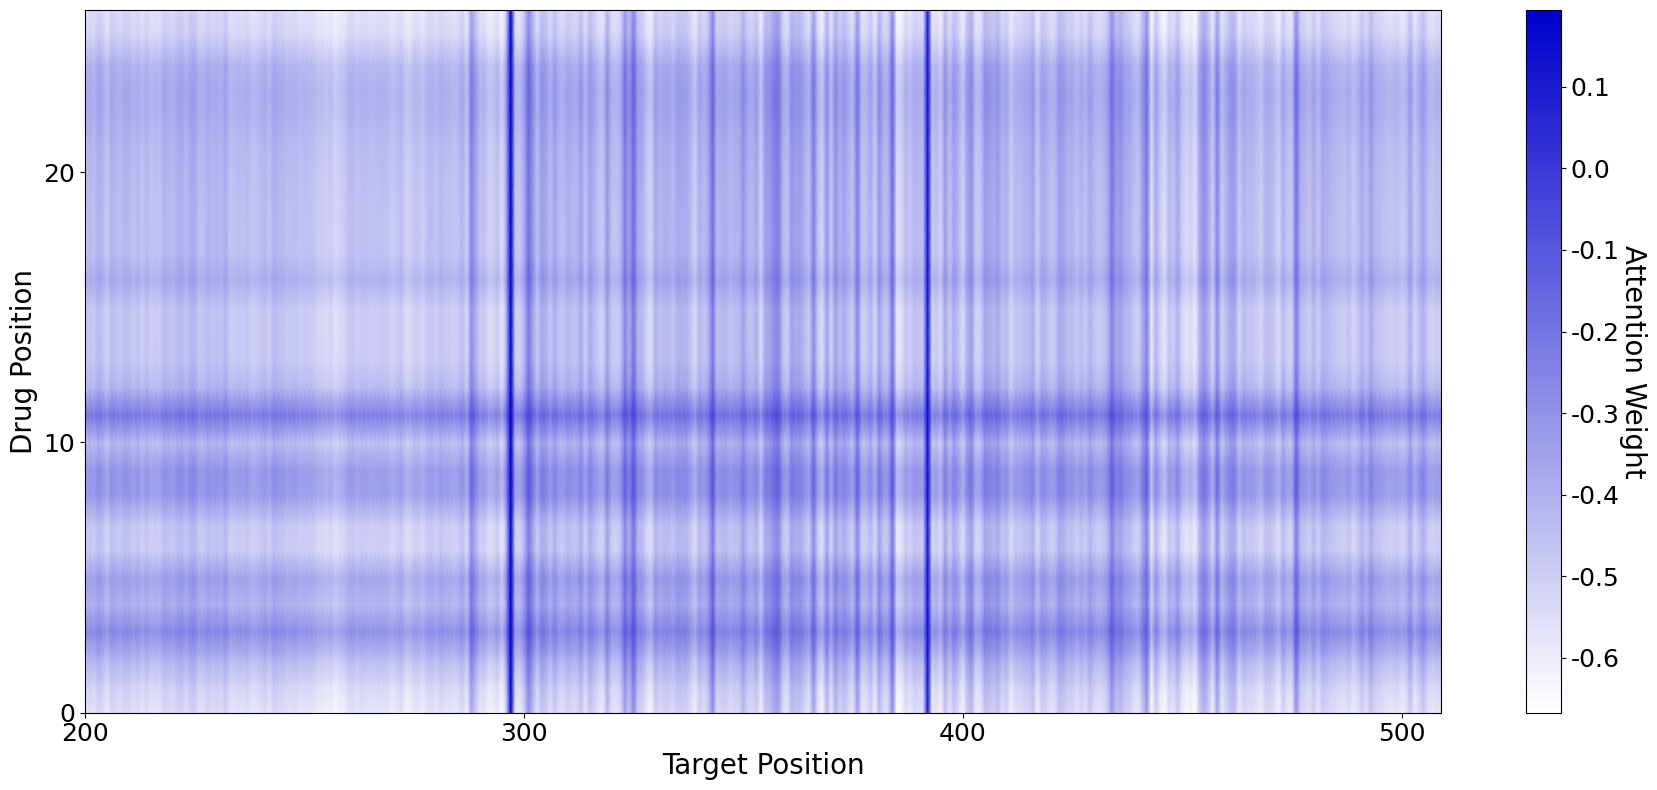

In [2]:
import pickle
import torch

sample_dir = '/data/qingyuyang/dta_ours/output/davis/warm_fold0/moe_fullemb_1d2d3d_MANnew_0.0001/itp/054820ee6232d2a73bd63964484c6ac0_09f453c1d3cb772c44c5334072c276e5'
att = torch.load(f'{sample_dir}/att3.pt', weights_only=True).cpu()
att = att.T
print(att.shape)
# std0, std1 = torch.std(att, dim=1), torch.std(att, dim=0)

drug = torch.load('/data/qingyuyang/dta_ours/data/davis/embed/unimol/054820ee6232d2a73bd63964484c6ac0.pt', weights_only=True)
drug_len = drug.shape[0]
prot = torch.load('/data/qingyuyang/dta_ours/data/davis/embed/saprot/09f453c1d3cb772c44c5334072c276e5.pt', weights_only=True)
prot_len = prot.shape[0]
print(prot_len, drug_len)

att = att[:min(drug_len, 300), 200:510]
print(att.shape)
######################################

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 生成示例数据 (1000x300) - 实际使用时替换为你的attention map
# 这里用随机数据模拟，你应该用自己的attention map替换这部分
np.random.seed(42)  # 设置随机种子，确保结果可复现

# 创建自定义颜色映射，从蓝色到红色
colors = [(1.0, 1.0, 1.0), (0.0, 0.0, 0.8)]  #,  蓝 -> 白 -> 红(1.0, 0.0, 0.0)
n_bins = 100  # 颜色渐变的步数
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=n_bins)

# 设置画布大小，考虑到1000x300的比例
plt.figure(figsize=(18, 8))  # 宽度12，高度20，适应1000比300的比例

y = np.arange(att.shape[0])  # x轴坐标 (长度=列数+1)
x = np.arange(200, 510)        # y轴坐标 (从200开始，长度=行数+1)

# 绘制热力图
# 使用pcolormesh而不是imshow，对于大矩阵更高效
heatmap = plt.pcolormesh(x, y, att, cmap=cmap, shading='gouraud')
# heatmap = plt.imshow(att, cmap=cmap)

# 添加颜色条，显示数值与颜色的对应关系
cbar = plt.colorbar(heatmap)
cbar.set_label('Attention Weight', rotation=270, labelpad=20, fontsize=20)
# cbar.set_ticks(np.linspace(0, 1, 11))  #n_bins 刻度范围改为0-1
cbar.set_ticklabels([f'{x:.1f}' for x in np.linspace(-0.7, 0.1, 9)], fontsize=18) # 

# 设置坐标轴标签和标题
plt.ylabel('Drug Position', fontsize=20)
plt.xlabel('Target Position', fontsize=20)

# 为了更好地显示，可以设置坐标轴刻度的间隔
plt.yticks(np.arange(0, att.shape[0]+1, 10), fontsize=18)
plt.xticks(np.arange(200, 200+att.shape[1]+1, 100), fontsize=18)

# 调整布局，防止标签被截断
plt.tight_layout()

print("att 最小值:", att.min().item())
print("att 最大值:", att.max().item())

# plt.legend()

# 如果需要保存图像，可以使用以下代码
plt.savefig('att3_new.png', dpi=200, bbox_inches='tight')

# 显示图像
plt.show()